# Libraries Import

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
# import librosa.display
import IPython.display as ipd

from itertools import cycle

plt.rcParams['figure.figsize'] = (19.2, 10.8) #define size of the plot to 1920*1080 pixs square

import scipy.stats

# Notes Array
An array of all possible notes and its respective frequency

In [2]:
note_arr = ['C0', 'C#0', 'D0', 'D#0', 'E0','F0', 'F#0', 'G0', 'G#0', 'A0', 'A#0', 'B0',
            'C1', 'C#1', 'D1', 'D#1', 'E1', 'F1', 'F#1', 'G1', 'G#1', 'A1', 'A#1', 'B1',
            'C2', 'C#2', 'D2', 'D#2', 'E2', 'F2', 'F#2', 'G2', 'G#2', 'A2', 'A#2', 'B2',
            'C3', 'C#3', 'D3', 'D#3', 'E3', 'F3', 'F#3', 'G3', 'G#3', 'A3', 'A#3', 'B3',
            'C4', 'C#4', 'D4', 'D#4', 'E4', 'F4', 'F#4', 'G4', 'G#4', 'A4', 'A#4', 'B4',
            'C5', 'C#5', 'D5', 'D#5', 'E5', 'F5', 'F#5', 'G5', 'G#5', 'A5', 'A#5', 'B5',
            'C6', 'C#6', 'D6', 'D#6', 'E6', 'F6', 'F#6', 'G6', 'G#6', 'A6', 'A#6', 'B6',
            'C7', 'C#7', 'D7', 'D#7', 'E7', 'F7', 'F#7', 'G7', 'G#7', 'A7', 'A#7', 'B7',
            'C8', 'C#8', 'D8', 'D#8', 'E8', 'F8', 'F#8', 'G8', 'G#8', 'A8', 'A#8', 'B8'] 
freq_arr =  [16.35, 17.32, 18.35, 19.45, 20.60, 21.83, 23.12, 24.50, 25.96, 27.50, 29.14, 30.87,
             32.70, 34.65, 36.71, 38.89, 41.20, 43.65, 46.25, 49.00, 51.91, 55.00, 58.27, 61.74,
             65.41, 69.30, 73.42, 77.78, 82.41, 87.31, 92.50, 98.00, 103.83, 110.00, 116.54, 123.47,
             130.81, 138.59, 146.83, 155.56, 164.81, 174.61, 185.00, 196.00, 207.65, 220.00, 233.08, 246.94,
             261.63, 277.18, 293.66, 311.13, 329.63, 349.23, 369.99, 392.00, 415.30, 440.00, 466.16, 493.88,
             523.25, 554.37, 587.33, 622.25, 659.25, 698.46, 739.99, 783.99, 830.61, 880.00, 932.33, 987.77,
             1046.50,1108.73,1174.66,1244.51,1318.51,1396.91,1479.98,1567.98,1661.22,1760.00,1864.66,1975.53,
             2093.00,2217.46,2349.32,2489.02,2637.02,2793.83,2959.96,3135.96,3322.44,3520.00,3729.31,3951.07,
             4186.01,4434.92,4698.63,4978.03,5274.04,5587.65,5919.91,6271.93,6644.88,7040.00,7458.62,7902.13]


# Function

In [3]:
def detect_pitch(y, sr):
    pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr, fmin=75, fmax=1600)
    # get indexes of the maximum value in each time slice
    max_indexes = np.argmax(magnitudes, axis=0)
    # get the pitches of the max indexes per time slice
    pitches = pitches[max_indexes, range(magnitudes.shape[1])]
    return pitches

def notespec(pit):
    i = 1
    while i<95:
        n = freq_arr[i]
        nu = freq_arr[i+1]
        nd = freq_arr[i-1]
        dif1 = ((nu-n)/2)+n
        dif2 = n - ((n-nd)/2)
        if pit >= dif2 and pit <= dif1:
            return note_arr[i]
        i+=1
        
        

# Raw Audio
The plot of raw audio in time domain

['S1T2S3.wav']


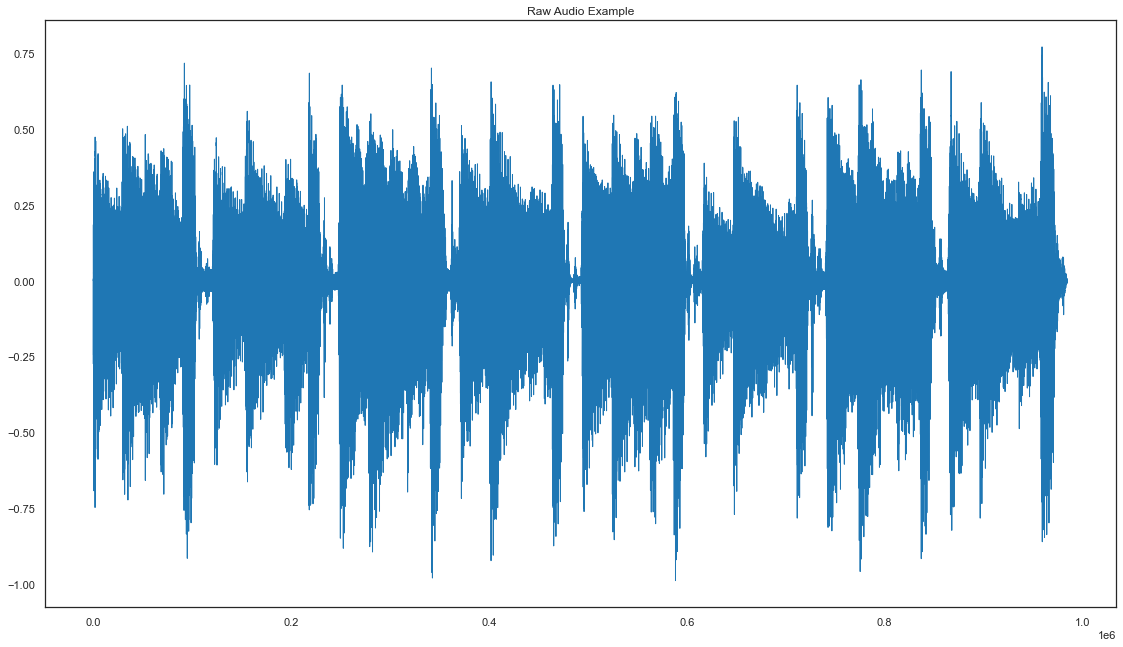

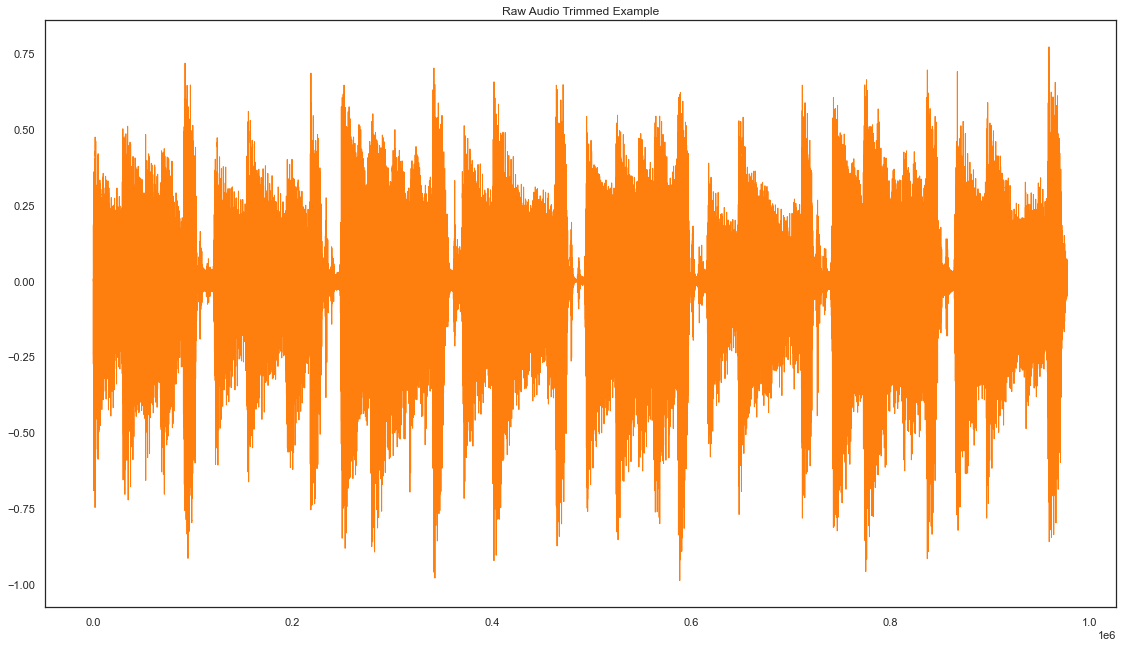

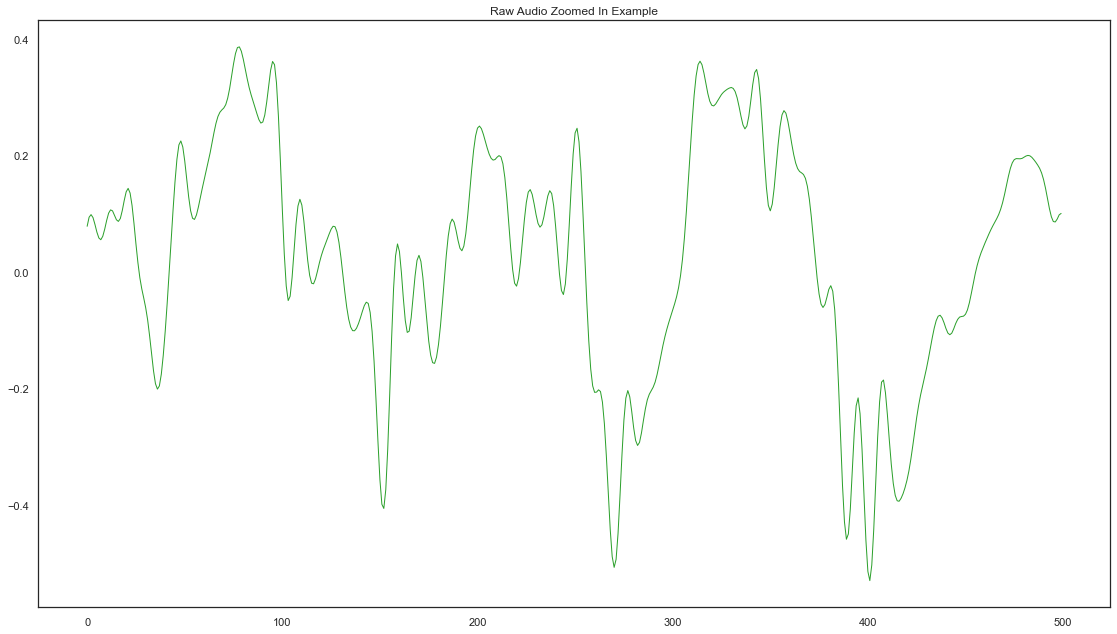

In [4]:
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

# grab the audio files into the array
# audio_files = glob('data/Thesis/S1T2S3.wav')
audio_files = glob('S1T2S3.wav')
print(audio_files)
# load the audio file to the variable
y, sr = librosa.load(audio_files[0], sr=44100)

# plot raw audio
plt.figure(0)
pd.Series(y).plot(
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()


# plot trimmed(the beginning) example
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
plt.figure(1)
pd.Series(y_trimmed).plot(
                  lw=1,
                  title='Raw Audio Trimmed Example',
                 color=color_pal[1])
plt.show()

# plot zoomed in example
plt.figure(2)
pd.Series(y[30000:30500]).plot(
                  lw=1,
                  title='Raw Audio Zoomed In Example',
                 color=color_pal[2])
plt.show()

In [5]:
ipd.Audio(audio_files[0])

# STFT of data
The spectogram of the data

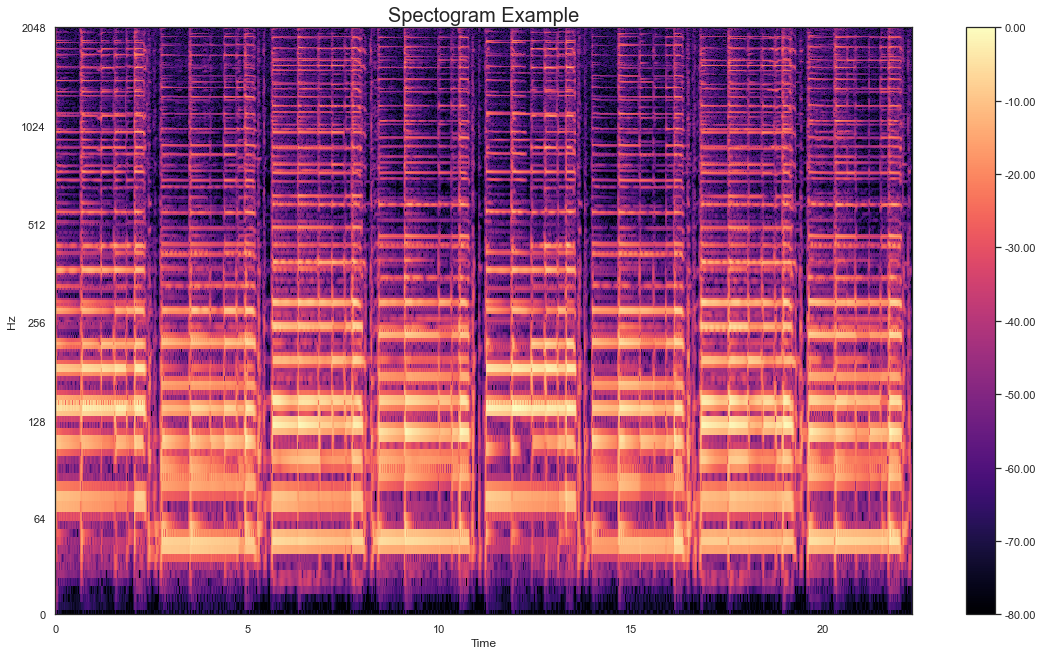

In [6]:

D = librosa.stft(y, n_fft=4096)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

fig, ax = plt.subplots()
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.ylim([0,2048])
plt.show()


# Onset Detection

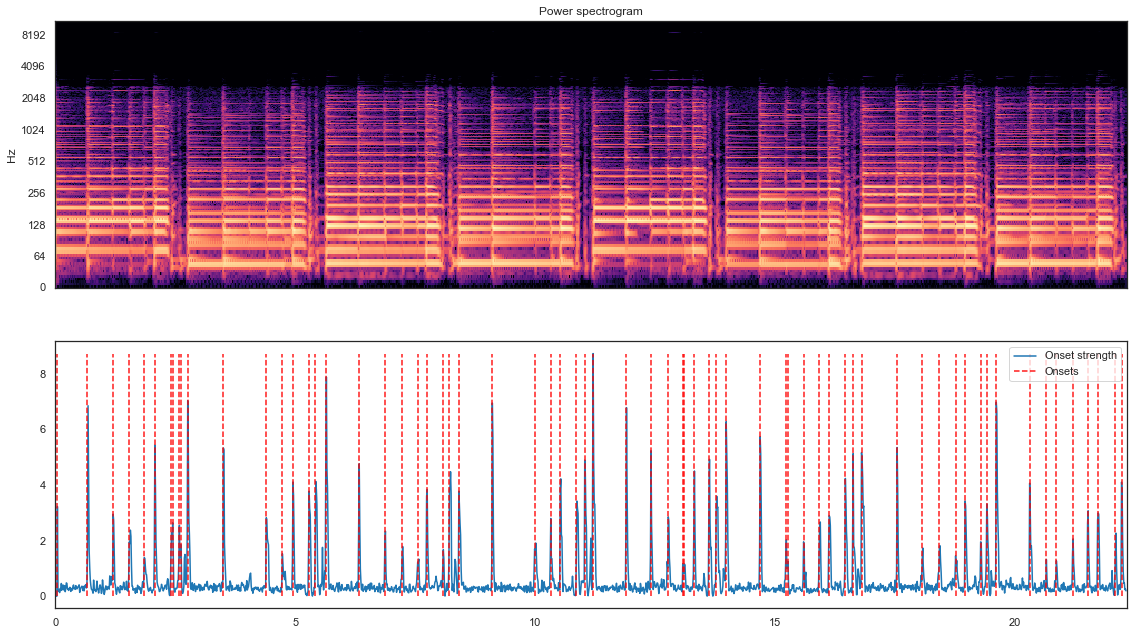

In [7]:

#y, sr = librosa.load(librosa.ex('trumpet'))
librosa.onset.onset_detect(y=y, sr=sr, units='time')
o_env = librosa.onset.onset_strength(y=y, sr=sr)
times = librosa.times_like(o_env, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)
D = np.abs(librosa.stft(y, n_fft=4096))
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         x_axis='time', y_axis='log', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
ax[1].plot(times, o_env, label='Onset strength')
ax[1].vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,
           linestyle='--', label='Onsets')
ax[1].legend()


# Beat

C:\Users\Kittipat\AppData\Local\Temp\ipykernel_16184\2928950428.py:1: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(onset_envelope=o_env, sr=sr)
C:\Users\Kittipat\AppData\Local\Temp\ipykernel_16184\2928950428.py:3: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  utempo = librosa.beat.tempo(onset_envelope=o_env, sr=sr, prior=prior)
C:\Users\Kittipat\AppData\Local\Temp\ipykernel_16184\2928950428.py:5: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  dtempo = librosa.beat.tempo(onset_envelope=o_env, sr=sr,
C:\Users\Kittipat\AppData\Local\Temp\ipykernel_16184\2928950428.py:9: FutureWarning: 

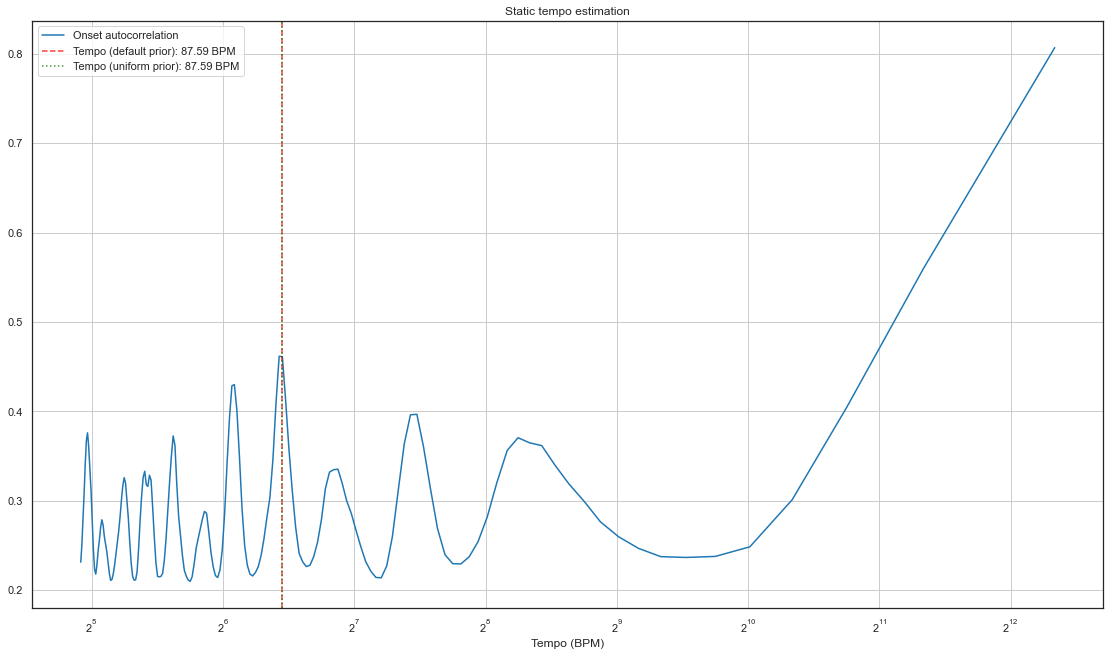

In [8]:
tempo = librosa.beat.tempo(onset_envelope=o_env, sr=sr)
prior = scipy.stats.uniform(30, 300)  # uniform over 30-300 BPM
utempo = librosa.beat.tempo(onset_envelope=o_env, sr=sr, prior=prior)

dtempo = librosa.beat.tempo(onset_envelope=o_env, sr=sr,
                            aggregate=None)

prior_lognorm = scipy.stats.lognorm(loc=np.log(120), scale=120, s=1)
dtempo_lognorm = librosa.beat.tempo(onset_envelope=o_env, sr=sr,
                                    aggregate=None,
                                    prior=prior_lognorm)

# Convert to scalar
tempo = tempo.item()
utempo = utempo.item()
# Compute 2-second windowed autocorrelation
hop_length = 512
ac = librosa.autocorrelate(o_env, max_size=2 * sr // hop_length)
freqs = librosa.tempo_frequencies(len(ac), sr=sr,
                                  hop_length=hop_length)
# Plot on a BPM axis.  We skip the first (0-lag) bin.
fig, ax = plt.subplots()
ax.semilogx(freqs[1:], librosa.util.normalize(ac)[1:],
             label='Onset autocorrelation', base=2)
ax.axvline(tempo, 0, 1, alpha=0.75, linestyle='--', color='r',
            label='Tempo (default prior): {:.2f} BPM'.format(tempo))
ax.axvline(utempo, 0, 1, alpha=0.75, linestyle=':', color='g',
            label='Tempo (uniform prior): {:.2f} BPM'.format(utempo))
ax.set(xlabel='Tempo (BPM)', title='Static tempo estimation')
ax.grid(True)
ax.legend()


## Dynamic Tempo Est

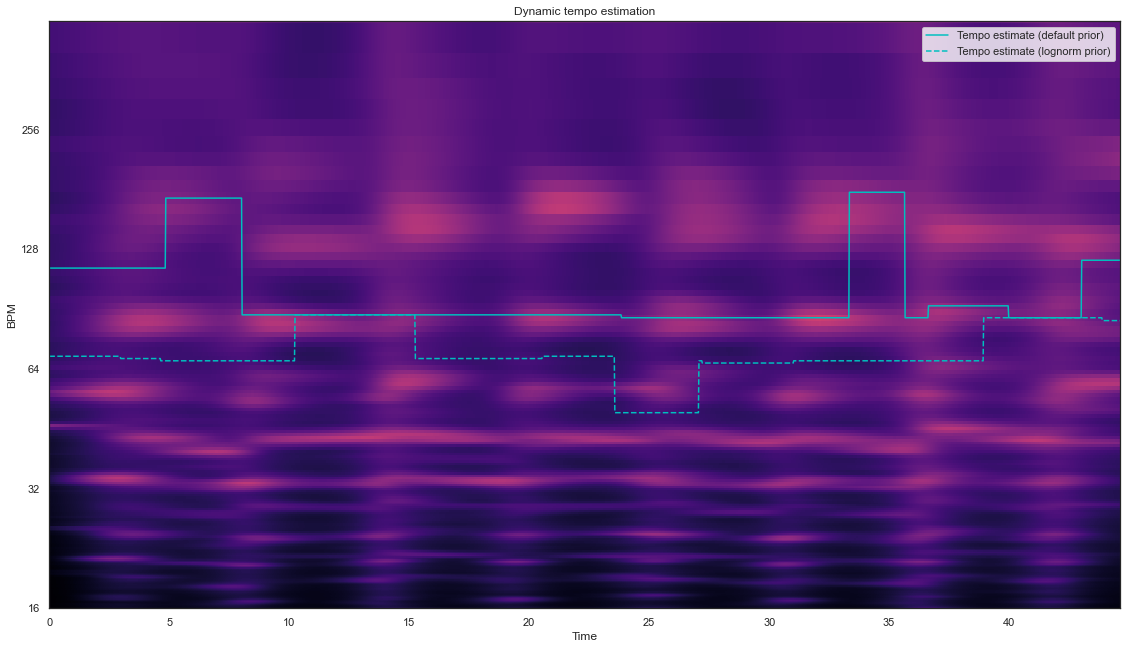

In [9]:
fig, ax = plt.subplots()
tg = librosa.feature.tempogram(onset_envelope=o_env, sr=sr,
                               hop_length=hop_length)
librosa.display.specshow(tg, x_axis='time', y_axis='tempo', cmap='magma', ax=ax)
ax.plot(librosa.times_like(dtempo), dtempo,
         color='c', linewidth=1.5, label='Tempo estimate (default prior)')
ax.plot(librosa.times_like(dtempo_lognorm), dtempo_lognorm,
         color='c', linewidth=1.5, linestyle='--',
         label='Tempo estimate (lognorm prior)')
ax.set(title='Dynamic tempo estimation')
ax.legend()
